<a href="https://colab.research.google.com/github/priyacoding/Singapore-Resale/blob/main/singapore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
#Reading all the csv files
df1 = pd.read_csv("/content/ResaleFlatPricesBasedonApprovalDate19901999.csv")
df2 = pd.read_csv("/content/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv")
df3 = pd.read_csv("/content/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv")
df4 = pd.read_csv("/content/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv")
df5 = pd.read_csv("/content/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv")

In [4]:
#Checking the head
print(df1.head)
print(df2.head)
print(df3.head)
print(df4.head)
print(df5.head)

<bound method NDFrame.head of           month        town  flat_type block       street_name storey_range  \
0       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3       1990-01  ANG MO KIO     1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4       1990-01  ANG MO KIO     3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   
...         ...         ...        ...   ...               ...          ...   
287191  1999-12      YISHUN  EXECUTIVE   611      YISHUN ST 61     10 TO 12   
287192  1999-12      YISHUN  EXECUTIVE   324       YISHUN CTRL     01 TO 03   
287193  1999-12      YISHUN  EXECUTIVE   392      YISHUN AVE 6     07 TO 09   
287194  1999-12      YISHUN  EXECUTIVE   356    YISHUN RING RD     04 TO 06   
287195  1999-12      YISHUN  EXECUTIVE   358    YISHUN RING RD     01 TO 03   

        floor_area_sq

In [5]:
#Merging all the dataframes
df = pd.concat([df1, df2, df3, df4, df5])

In [6]:
#Checking Columns and head
print(df.head(5))

     month        town flat_type block       street_name storey_range  \
0  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
1  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     04 TO 06   
2  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     10 TO 12   
3  1990-01  ANG MO KIO    1 ROOM   309  ANG MO KIO AVE 1     07 TO 09   
4  1990-01  ANG MO KIO    3 ROOM   216  ANG MO KIO AVE 1     04 TO 06   

   floor_area_sqm      flat_model  lease_commence_date  resale_price  \
0            31.0        IMPROVED                 1977        9000.0   
1            31.0        IMPROVED                 1977        6000.0   
2            31.0        IMPROVED                 1977        8000.0   
3            31.0        IMPROVED                 1977        6000.0   
4            73.0  NEW GENERATION                 1976       47200.0   

  remaining_lease  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  


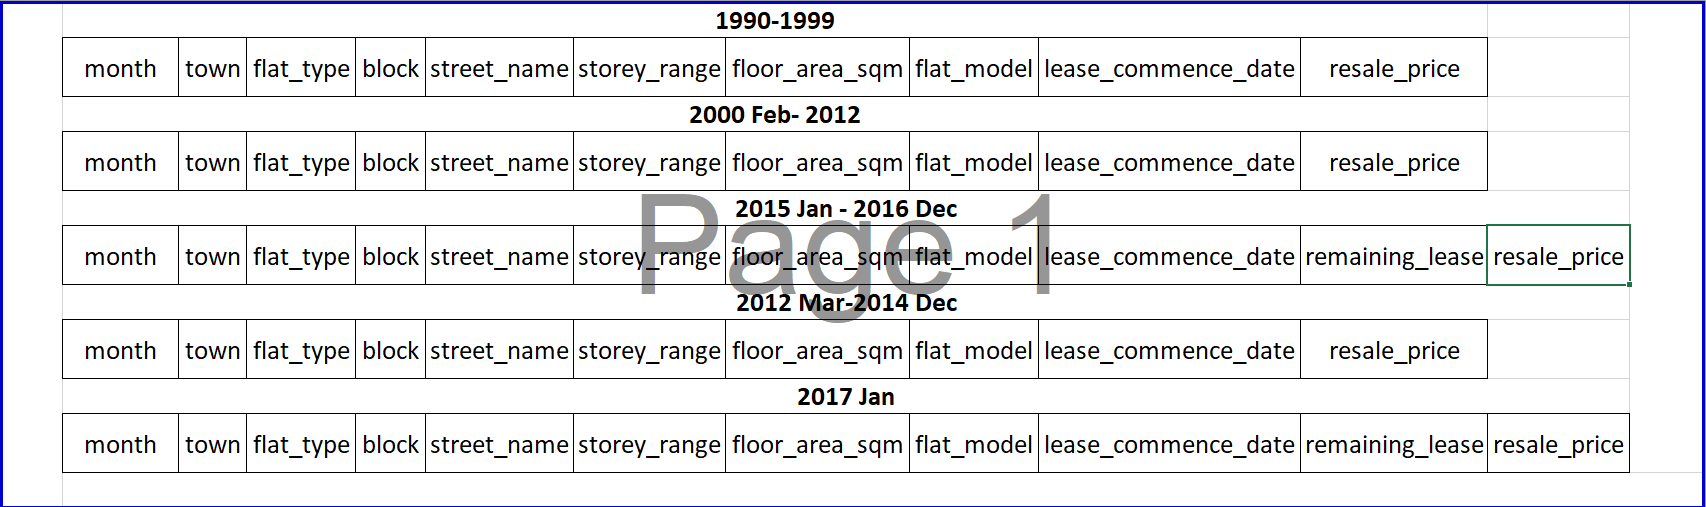

In [7]:
#Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915274 entries, 0 to 169070
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                915274 non-null  object 
 1   town                 915274 non-null  object 
 2   flat_type            915274 non-null  object 
 3   block                915274 non-null  object 
 4   street_name          915274 non-null  object 
 5   storey_range         915274 non-null  object 
 6   floor_area_sqm       915274 non-null  float64
 7   flat_model           915274 non-null  object 
 8   lease_commence_date  915274 non-null  int64  
 9   resale_price         915274 non-null  float64
 10  remaining_lease      206224 non-null  object 
dtypes: float64(2), int64(1), object(8)
memory usage: 83.8+ MB


About the Data type in the table above:

* Date: month, year
* Numeric: block, floor_area_sqm, lease_commence_date, remaining_lease, resale_price
* Categorical: town, flat_type, storey_range, flat_model, street_name, block
* Columns to be converted to numeric: month, year, town, flat_type, block, storey_range, flat_model, street_name

In [8]:
#Removing the alphanumeric characters from the block column
# Converting the block column to int
df['block'] = df['block'].astype(str)
df['block'] = df['block'].apply(lambda x: ''.join(char for char in x if char in '0123456789'))
# Now df['block'] should contain only digits in each element
df['block'] = df['block'].astype(int)

In [9]:
#converting the month column to year and month
df['month'] = pd.to_datetime(df['month'])
#Convert month to year and month
df['year'] = df['month'].apply(lambda i : i.year)
df['month'] = df['month'].apply(lambda i : i.month)

In [10]:
#Summarizing the data
df.describe()

,month,block,floor_area_sqm,lease_commence_date,resale_price,year
count,915274.000000,915274.000000,915274.000000,915274.000000,9.152740e+05,915274.000000
mean,6.595489,348.379879,95.695435,1988.146256,3.172071e+05,2005.937054
std,3.407465,255.125054,25.848036,10.529492,1.673772e+05,9.155541
min,1.000000,1.000000,28.000000,1966.000000,5.000000e+03,1990.000000
25%,4.000000,127.000000,73.000000,1981.000000,1.918000e+05,1998.000000
50%,7.000000,302.000000,93.000000,1986.000000,2.950000e+05,2005.000000
75%,10.000000,534.000000,113.000000,1996.000000,4.130000e+05,2013.000000
max,12.000000,999.000000,307.000000,2022.000000,1.500000e+06,2023.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915274 entries, 0 to 169070
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                915274 non-null  int64  
 1   town                 915274 non-null  object 
 2   flat_type            915274 non-null  object 
 3   block                915274 non-null  int64  
 4   street_name          915274 non-null  object 
 5   storey_range         915274 non-null  object 
 6   floor_area_sqm       915274 non-null  float64
 7   flat_model           915274 non-null  object 
 8   lease_commence_date  915274 non-null  int64  
 9   resale_price         915274 non-null  float64
 10  remaining_lease      206224 non-null  object 
 11  year                 915274 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 90.8+ MB


In [12]:
#Checking for null values
df.isnull().sum()

month                       0
town                        0
flat_type                   0
block                       0
street_name                 0
storey_range                0
floor_area_sqm              0
flat_model                  0
lease_commence_date         0
resale_price                0
remaining_lease        709050
year                        0
dtype: int64

In [13]:
#fill the null values suing ML models
df = df.fillna(0)

In [14]:
df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
resale_price           0
remaining_lease        0
year                   0
dtype: int64

In [15]:
#saving the data
df.to_csv('ResaleFlatPrices.csv', index=False)

In [16]:
df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,0,1990
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,0,1990
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,0,1990
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,0,1990
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,0,1990


Exploratory Data Analysis

<ipython-input-17-5d1cf6ecfc79>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['block'])


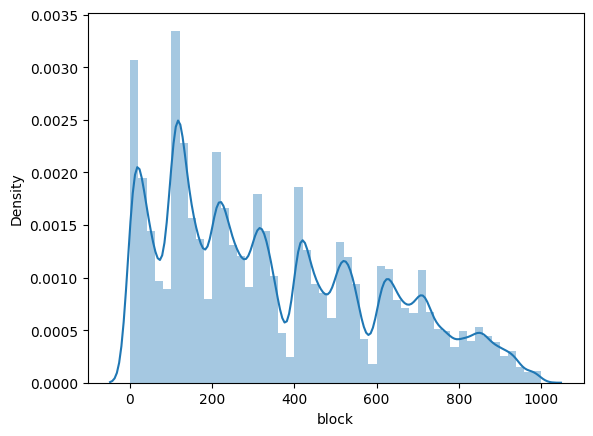

<ipython-input-17-5d1cf6ecfc79>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['floor_area_sqm'])


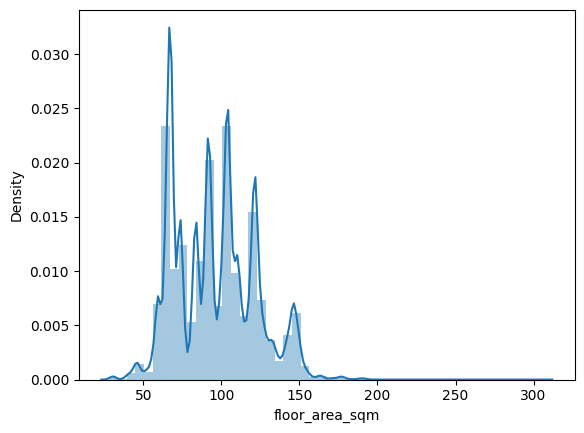

<ipython-input-17-5d1cf6ecfc79>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lease_commence_date'])


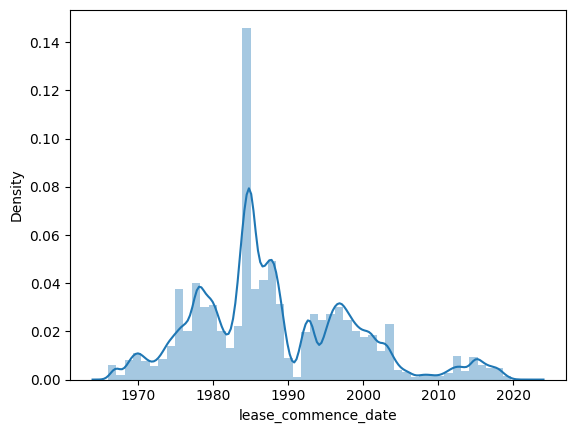

In [17]:
#Checking Distribution
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(df['block'])
plt.show()
sns.distplot(df['floor_area_sqm'])
plt.show()
sns.distplot(df['lease_commence_date'])
plt.show()

The distribution of the block, floor_area_sqm and lease_commence_date are right skewed.

In [18]:
#replacing MULTI-GENERATION with MULTI GENERATION
df['flat_type'] = df['flat_type'].replace('MULTI-GENERATION','MULTI GENERATION')
df['flat_type'].unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION'], dtype=object)

          flat_type  flat_model
0            1 ROOM           2
1            2 ROOM           9
2            3 ROOM          15
3            4 ROOM          18
4            5 ROOM          17
5         EXECUTIVE           8
6  MULTI GENERATION           2


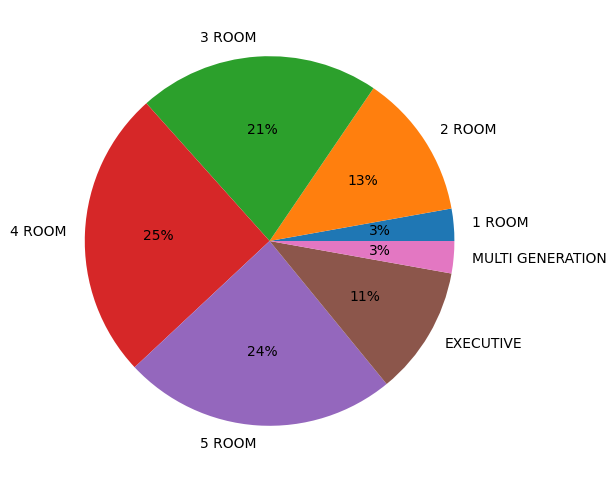

In [19]:
#Checking flat type with respect to flat model
import matplotlib.pyplot as plt
temp = pd.DataFrame(df.groupby('flat_type')['flat_model'].nunique()).reset_index()
print(temp)
plt.figure(figsize = (12,6))
plt.pie(temp['flat_model'], labels = temp['flat_type'], autopct = '%.0f%%')
plt.show()

# In Floor type with respect to floor model
4 Room, 5 Room and 3 ROOM are the most popular flat types folowed by others

<Axes: xlabel='flat_type', ylabel='floor_area_sqm'>

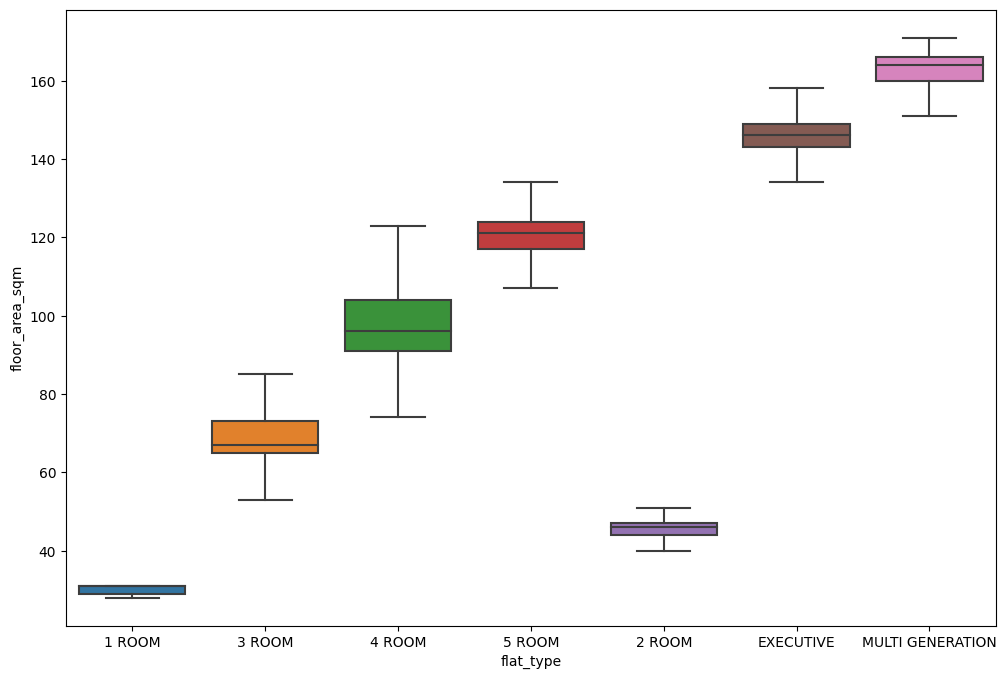

In [20]:
#Checking flat type with respect to floor area
import seaborn as sns
plt.figure(figsize = (12,8))
sns.boxplot(x = 'flat_type', y ='floor_area_sqm', data = df, showfliers = False)

On the bases of floor area to flat type *4 room and 3 room are the most popular flat types

<Axes: xlabel='flat_type', ylabel='resale_price'>

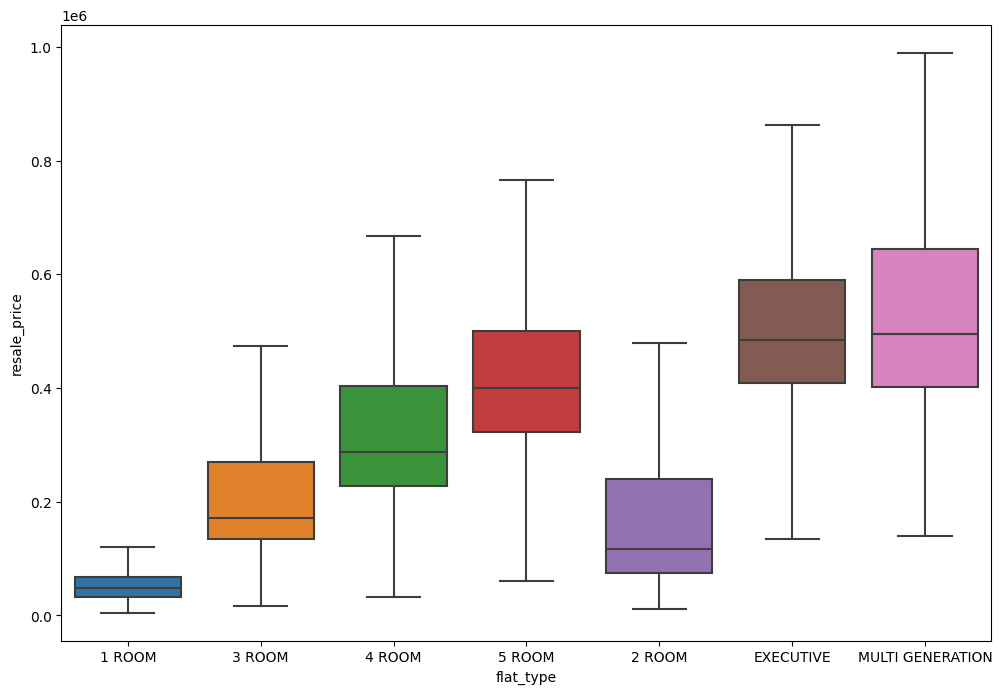

In [21]:
# Distribution of resale_price based on flat_type
plt.figure(figsize = (12,8))
sns.boxplot(x = 'flat_type', y ='resale_price', data = df, showfliers = False)

On the bases of flat type to resale price

* Multi Generation and Executive are the most expensive flat types
* 1 Room and 2 Room are the least expensive flat types

In [22]:
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease', 'year'],
      dtype='object')

In [23]:
#print all the unique values in category column
print(df['month'].unique())
print("---------------------------------------------------------------")
print(df['year'].unique())
print("---------------------------------------------------------------")
print(df['town'].unique())
print("---------------------------------------------------------------")
print(df['flat_type'].unique())
print("---------------------------------------------------------------")
print(df['storey_range'].unique())
print("---------------------------------------------------------------")
print(df['flat_model'].unique())
print("---------------------------------------------------------------")
df['street_name'].unique()

[ 1  2  3  4  5  6  7  8  9 10 11 12]
---------------------------------------------------------------
[1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2008 2009 2010 2011 2012 2015 2016 2013 2014 2017
 2018 2019 2020 2021 2022 2023]
---------------------------------------------------------------
['ANG MO KIO' 'BEDOK' 'BISHAN' 'BUKIT BATOK' 'BUKIT MERAH' 'BUKIT TIMAH'
 'CENTRAL AREA' 'CHOA CHU KANG' 'CLEMENTI' 'GEYLANG' 'HOUGANG'
 'JURONG EAST' 'JURONG WEST' 'KALLANG/WHAMPOA' 'MARINE PARADE'
 'QUEENSTOWN' 'SENGKANG' 'SERANGOON' 'TAMPINES' 'TOA PAYOH' 'WOODLANDS'
 'YISHUN' 'LIM CHU KANG' 'SEMBAWANG' 'BUKIT PANJANG' 'PASIR RIS' 'PUNGGOL']
---------------------------------------------------------------
['1 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' '2 ROOM' 'EXECUTIVE'
 'MULTI GENERATION']
---------------------------------------------------------------
['10 TO 12' '04 TO 06' '07 TO 09' '01 TO 03' '13 TO 15' '19 TO 21'
 '16 TO 18' '25 TO 27' '22 TO 24' '28 T

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [24]:
#append unique values in a list for selection of dropdown in streamlit(front end)
a = '''
town = []
for i in range(len(df['town'].unique())):
  town.append(df['town'].unique()[i])
import json
# Save to a JSON file
with open('town.json', 'w') as file:
    json.dump(town, file)

flat_type = []
for i in range(len(df['flat_type'].unique())):
  flat_type.append(df['flat_type'].unique()[i])
with open('flat_type.json', 'w') as file:
    json.dump(flat_type, file)

street_name = []
for i in range(len(df['street_name'].unique())):
  street_name.append(df['street_name'].unique()[i])
with open('street_name.json', 'w') as file:
    json.dump(street_name, file)


storey_range = []
for i in range(len(df['storey_range'].unique())):
  storey_range.append(df['storey_range'].unique()[i])
with open('storey_range.json', 'w') as file:
    json.dump(storey_range, file)

flat_model = []
for i in range(len(df['flat_model'].unique())):
  flat_model.append(df['flat_model'].unique()[i])
with open('flat_model.json', 'w') as file:
    json.dump(flat_model, file) '''

In [25]:
#sum of unique values
df.nunique()

month                    12
town                     27
flat_type                 7
block                   986
street_name             584
storey_range             25
floor_area_sqm          210
flat_model               34
lease_commence_date      56
resale_price           9346
remaining_lease         721
year                     34
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915274 entries, 0 to 169070
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                915274 non-null  int64  
 1   town                 915274 non-null  object 
 2   flat_type            915274 non-null  object 
 3   block                915274 non-null  int64  
 4   street_name          915274 non-null  object 
 5   storey_range         915274 non-null  object 
 6   floor_area_sqm       915274 non-null  float64
 7   flat_model           915274 non-null  object 
 8   lease_commence_date  915274 non-null  int64  
 9   resale_price         915274 non-null  float64
 10  remaining_lease      915274 non-null  object 
 11  year                 915274 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 90.8+ MB


The category column has been converted into numeric using an encoder

In [27]:
#converting the category column into numeric using label encoder
from sklearn.preprocessing import LabelEncoder
le1 = LabelEncoder()
df['town']= le1.fit_transform(df['town'])
le2 = LabelEncoder()
df['flat_type']= le2.fit_transform(df['flat_type'])
le3 = LabelEncoder()
df['street_name']= le3.fit_transform(df['street_name'])
le4 = LabelEncoder()
df['storey_range']= le4.fit_transform(df['storey_range'])
le5 = LabelEncoder()
df['flat_model']= le5.fit_transform(df['flat_model'])

In [28]:
#Save all the label encoder in a pickle file
import pickle
#pickle.dump(le1, open('label_encoder1twn.pkl', 'wb'))
#pickle.dump(le2, open('label_encoder2FT.pkl', 'wb'))
#pickle.dump(le3, open('label_encoder3SN.pkl', 'wb'))
#pickle.dump(le4, open('label_encoder4SR.pkl', 'wb'))
#pickle.dump(le5, open('label_encoder5FM.pkl', 'wb'))

In [29]:
#category_to_check = 'Premium Apartment Loft'

# Transform the chosen category to its encoded value
#encoded_value = le.transform([category_to_check])[0]

##print(f"The encoded value for '{category_to_check}' is: {encoded_value}")

In [30]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,0,0,309,13,5,31.0,7,1977,9000.0,0,1990
1,1,0,0,309,13,2,31.0,7,1977,6000.0,0,1990
2,1,0,0,309,13,5,31.0,7,1977,8000.0,0,1990
3,1,0,0,309,13,4,31.0,7,1977,6000.0,0,1990
4,1,0,2,216,13,2,73.0,20,1976,47200.0,0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
169066,12,26,5,643,572,5,146.0,15,1987,838000.0,62 years 10 months,2023
169067,12,26,5,643,572,5,142.0,5,1987,755000.0,62 years 10 months,2023
169068,12,26,5,826,575,0,142.0,5,1988,780000.0,63 years 02 months,2023
169069,12,26,5,834,575,0,142.0,5,1988,785000.0,63 years 02 months,2023


<Axes: >

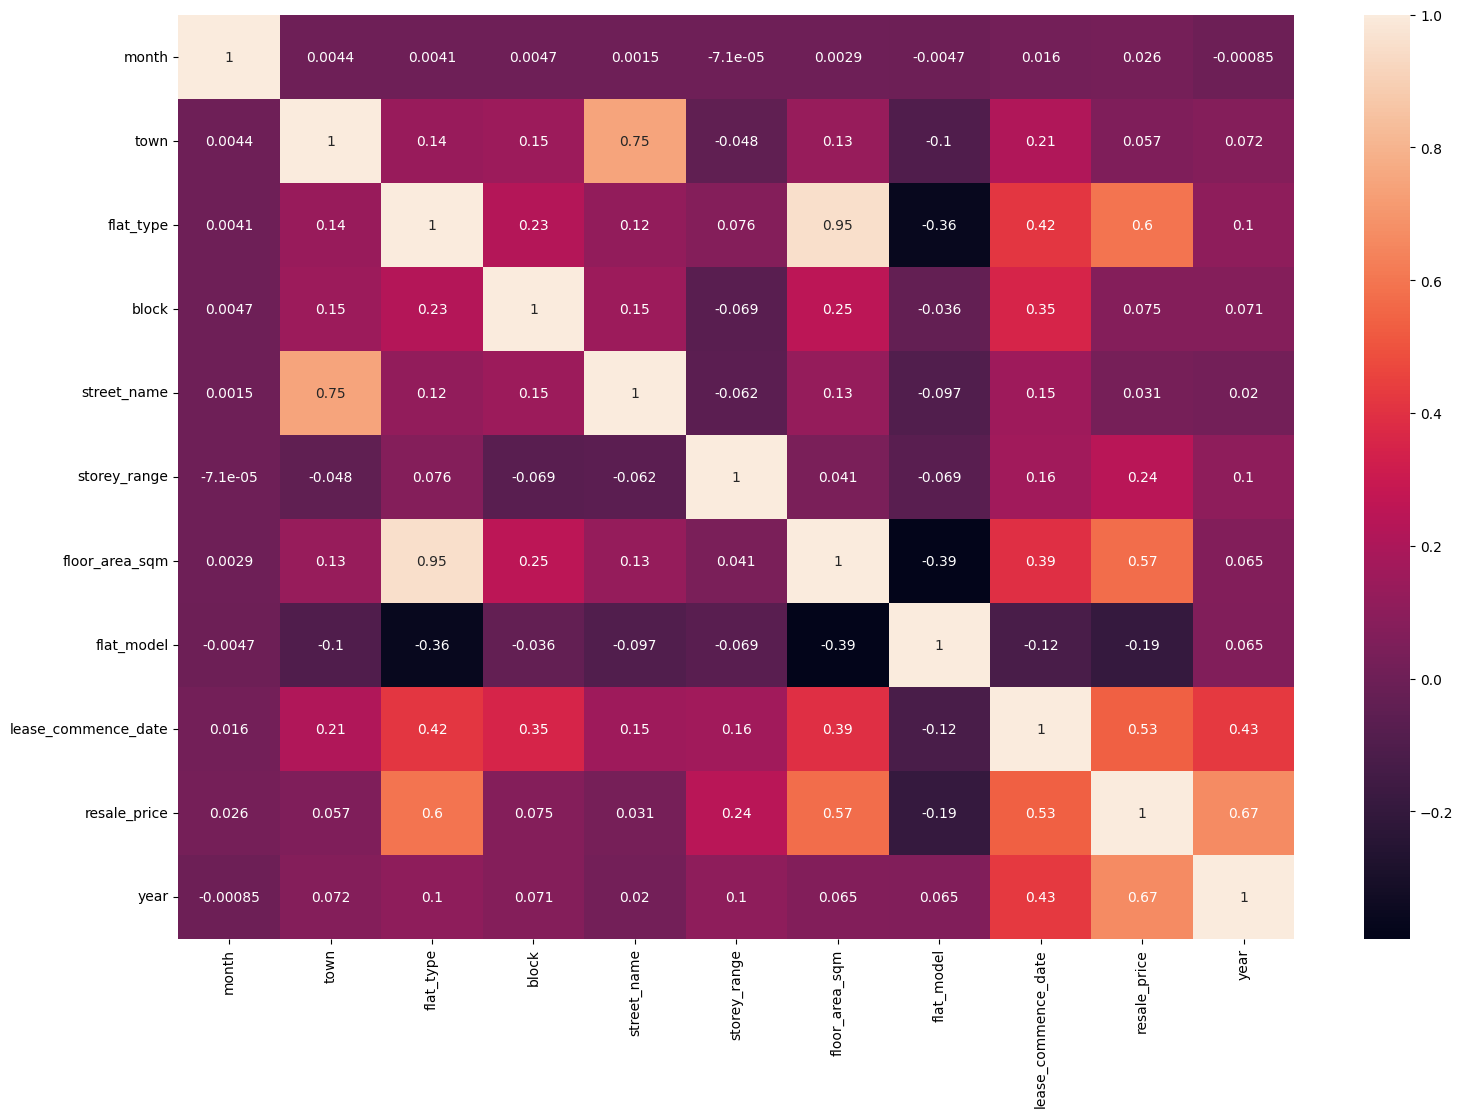

In [31]:
#Correlation
feature_cols = ['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price', 'year']
plt.figure(figsize = (18,12))
sns.heatmap(df[feature_cols].corr(), annot = True)

Informations Obtained From Correlation

* Flat type and flat area are highly correlated
* Town and Street name are highly correlated
* Resale price and year are highly correlated
* Flat type and resale price are highly correlated
* Floor area and resale price are highly correlated
* resale_price and flat_type are highly correlated
* Town, month, street name and storey range are lessly correlated to resale price

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 915274 entries, 0 to 169070
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                915274 non-null  int64  
 1   town                 915274 non-null  int64  
 2   flat_type            915274 non-null  int64  
 3   block                915274 non-null  int64  
 4   street_name          915274 non-null  int64  
 5   storey_range         915274 non-null  int64  
 6   floor_area_sqm       915274 non-null  float64
 7   flat_model           915274 non-null  int64  
 8   lease_commence_date  915274 non-null  int64  
 9   resale_price         915274 non-null  float64
 10  remaining_lease      915274 non-null  object 
 11  year                 915274 non-null  int64  
dtypes: float64(2), int64(9), object(1)
memory usage: 90.8+ MB


In [33]:
#describe
df.describe()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year
count,915274.000000,915274.000000,915274.000000,915274.000000,915274.000000,915274.000000,915274.000000,915274.000000,915274.000000,9.152740e+05,915274.000000
mean,6.595489,13.642991,3.013346,348.379879,285.894558,3.403026,95.695435,15.713011,1988.146256,3.172071e+05,2005.937054
std,3.407465,8.800853,0.948710,255.125054,181.652454,2.656598,25.848036,6.677597,10.529492,1.673772e+05,9.155541
min,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,28.000000,0.000000,1966.000000,5.000000e+03,1990.000000
25%,4.000000,5.000000,2.000000,127.000000,122.000000,2.000000,73.000000,9.000000,1981.000000,1.918000e+05,1998.000000
50%,7.000000,13.000000,3.000000,302.000000,278.000000,4.000000,93.000000,16.000000,1986.000000,2.950000e+05,2005.000000
75%,10.000000,23.000000,4.000000,534.000000,460.000000,5.000000,113.000000,21.000000,1996.000000,4.130000e+05,2013.000000
max,12.000000,26.000000,6.000000,999.000000,583.000000,24.000000,307.000000,33.000000,2022.000000,1.500000e+06,2023.000000


In [34]:
from sklearn.model_selection import train_test_split

# Assuming 'resale_price' and 'remaining_lease' are columns to be dropped
columns_to_drop = ['resale_price', 'remaining_lease']
# Separate features (X) and target variable (y)
X = df.drop(columns=columns_to_drop)
y = df['resale_price']

# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
x_train

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,year
24194,3,22,2,124,420,0,81.0,21,1985,2018
216737,10,13,4,728,263,2,121.0,7,1989,1998
15476,10,4,2,80,491,2,67.0,23,2013,2017
148850,1,26,2,710,557,5,68.0,20,1984,1997
227629,2,11,3,142,318,2,108.0,16,1984,2007
...,...,...,...,...,...,...,...,...,...,...
259178,6,11,2,328,210,5,67.0,20,1983,1999
78642,2,25,4,214,330,13,118.0,9,1981,2002
131932,8,1,2,537,42,2,83.0,20,1980,1996
14308,10,20,3,507,511,0,91.0,16,2001,2015


In [36]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 732219 entries, 24194 to 121958
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                732219 non-null  int64  
 1   town                 732219 non-null  int64  
 2   flat_type            732219 non-null  int64  
 3   block                732219 non-null  int64  
 4   street_name          732219 non-null  int64  
 5   storey_range         732219 non-null  int64  
 6   floor_area_sqm       732219 non-null  float64
 7   flat_model           732219 non-null  int64  
 8   lease_commence_date  732219 non-null  int64  
 9   year                 732219 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 61.5 MB


In [37]:
#Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()


In a Jupyter environment, please rerun this cell to show the HTML representation or trust the notebook.
On GitHub, the HTML representation is unable to render, please try loading this page with nbviewer.org.

In [38]:
#Predicting the model
y_pred = dt.predict(x_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Absolute Error: 19299.28144155217
Mean Squared Error: 859868931.6498975
R2 Score: 0.9692608132526797


In [39]:
#save the model
pickle.dump(dt, open('dt.pkl', 'wb'))

<Axes: xlabel='resale_price'>

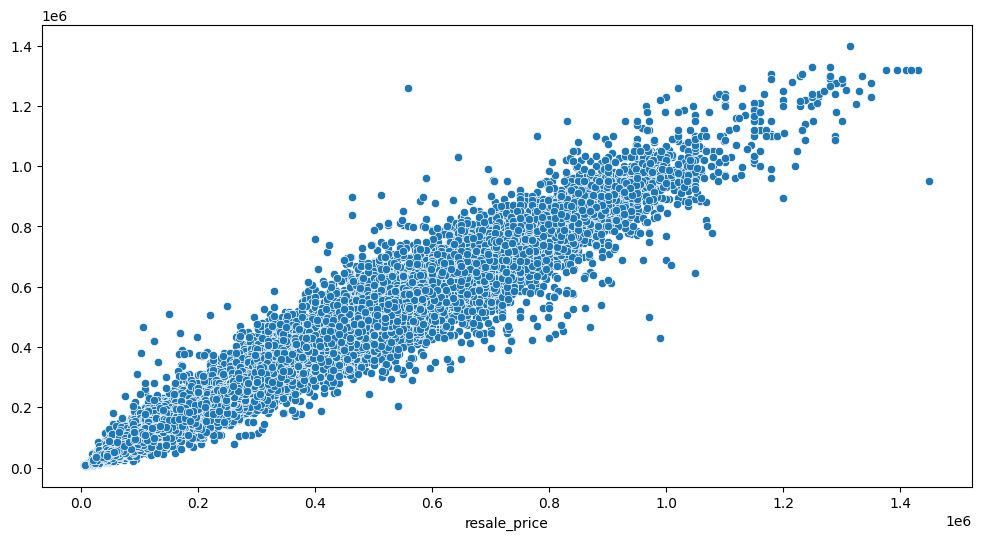

In [40]:
#Scatter plot of predicted vs actual
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

In [41]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=50, max_depth=10)
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')
print(f'Mean Absolute Error: {mae}')

Mean Squared Error: 2184735236.9231024
R2 Score: 0.9218985801564303
Mean Absolute Error: 32305.910262805406


<Axes: xlabel='resale_price'>

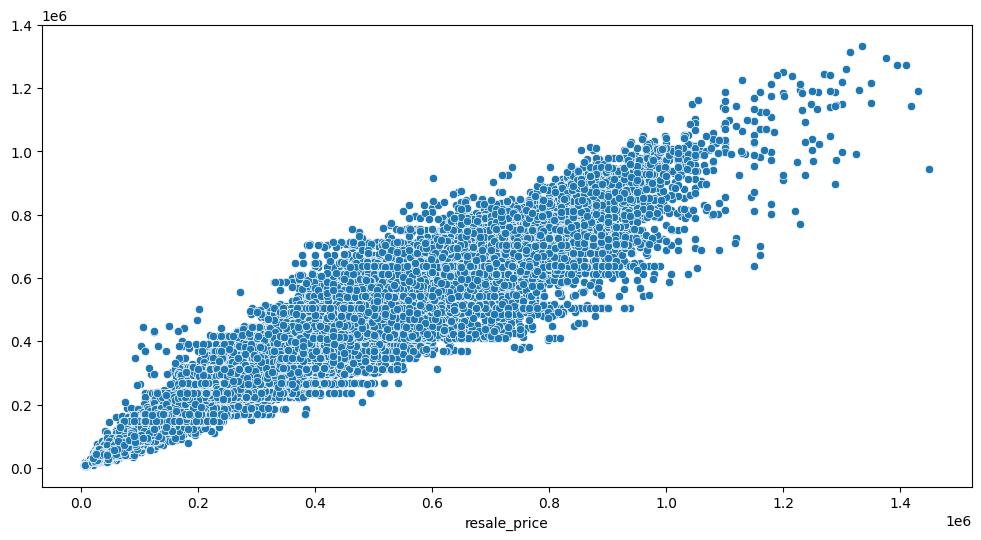

In [42]:
#Scatter plot of predicted vs actual
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

In [43]:
#save the model
pickle.dump(rf, open('rf.pkl', 'wb'))

In [44]:
# Linear Regression
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(x_train, y_train)

# Predict the target variable using the test data
y_pred = lr.predict(x_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

Mean Squared Error: 6471116142.800477
Mean Absolute Error: 59977.13950584655
R2 Score: 0.7686660835675667


<Axes: xlabel='resale_price'>

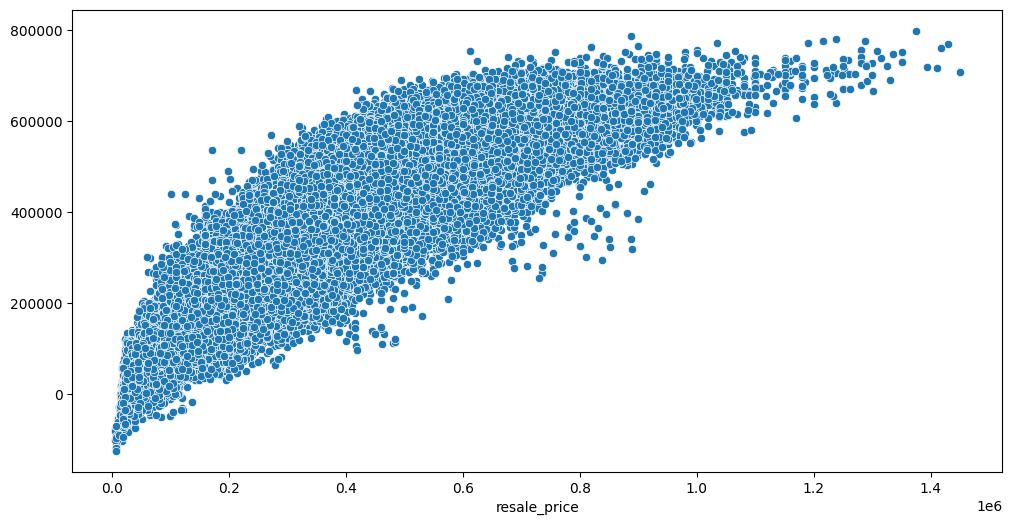

In [45]:
#Scatter plot of predicted vs actual
from matplotlib import pyplot as plt
import seaborn as sns
plt.figure(figsize = (12,6))
sns.scatterplot(x = y_test, y = y_pred)

In [46]:
#Save the model
import pickle

pickle.dump(lr, open('lr.pkl', 'wb'))

In the end after running all the models, we can see that Decision Tree Regressor is the best model for this project.

* As it has the highest R2 score and lowest mean squared error
* It is computationally efficient

In [47]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,year
0,1,0,0,309,13,5,31.0,7,1977,9000.0,0,1990
1,1,0,0,309,13,2,31.0,7,1977,6000.0,0,1990
2,1,0,0,309,13,5,31.0,7,1977,8000.0,0,1990
3,1,0,0,309,13,4,31.0,7,1977,6000.0,0,1990
4,1,0,2,216,13,2,73.0,20,1976,47200.0,0,1990
...,...,...,...,...,...,...,...,...,...,...,...,...
169066,12,26,5,643,572,5,146.0,15,1987,838000.0,62 years 10 months,2023
169067,12,26,5,643,572,5,142.0,5,1987,755000.0,62 years 10 months,2023
169068,12,26,5,826,575,0,142.0,5,1988,780000.0,63 years 02 months,2023
169069,12,26,5,834,575,0,142.0,5,1988,785000.0,63 years 02 months,2023


In [49]:
#month town flat_type block street_name	storey_range floor_area_sqm	flat_model lease_commence_date year
#1	    0	   2	  170	    17	          4	           69.0	         9	        20	           2000

Checking the output by giving an example

In [50]:
#Testing the model
import numpy as np

# Sample data
ns = np.array([[1, 'ANG MO KIO', '2 ROOM', 309, 'ANG MO KIO AVE 1', '10 TO 12', 44, 'Improved', 1977, 2017]])

#columns to encode
en1 = le1.transform(ns[:, [1]])
en2 = le2.transform(ns[:, [2]])
en3 = le3.transform(ns[:, [4]])
en4 = le4.transform(ns[:, [5]])
en5 = le5.transform(ns[:, [7]])

# Convert 1D arrays to 2D arrays
en1 = en1[:, np.newaxis]
en2 = en2[:, np.newaxis]
en3 = en3[:, np.newaxis]
en4 = en4[:, np.newaxis]
en5 = en5[:, np.newaxis]

ns = np.concatenate((ns[:, [0]], en1, en2, ns[:, [3]], en3, en4, ns[:, [6]], en5, ns[:, [8]], ns[:, [9]]), axis=1)

#predict the resale price with the model
resale = dt.predict(ns)
print(f'the resale price is :{resale}')

the resale price is :[250000.]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was

In [55]:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

xgb = XGBRegressor()
xgb.fit(x_train, y_train)
y_pred = xgb.predict(x_test)

print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred)}')
print(f'R2 Score: {r2_score(y_test, y_pred)}')

Mean Squared Error: 588772094.1343458
R2 Score: 0.9789521697004685


In [ ]:
from sklearn.svm import SVR
# Assuming you have already trained the SVR model
svr = SVR()
svr.fit(x_train, y_train)
#save the models
pickle.dump(rf, open('rf.pkl', 'wb'))
pickle.dump(xgb, open('xgb.pkl', 'wb'))
pickle.dump(svr, open('svr.pkl', 'wb'))